<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

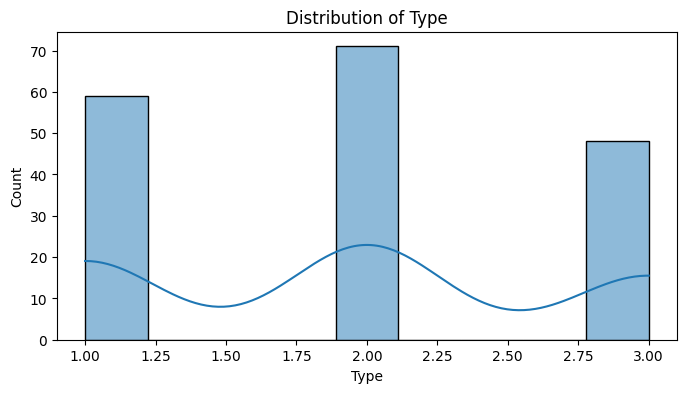

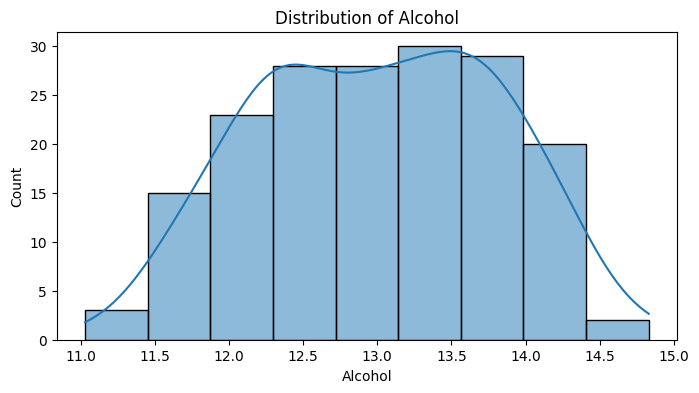

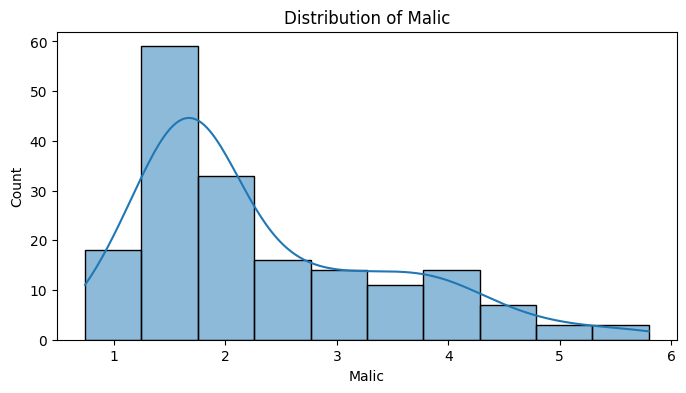

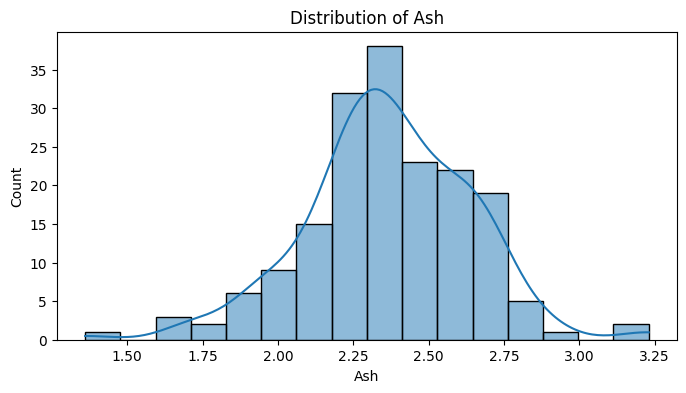

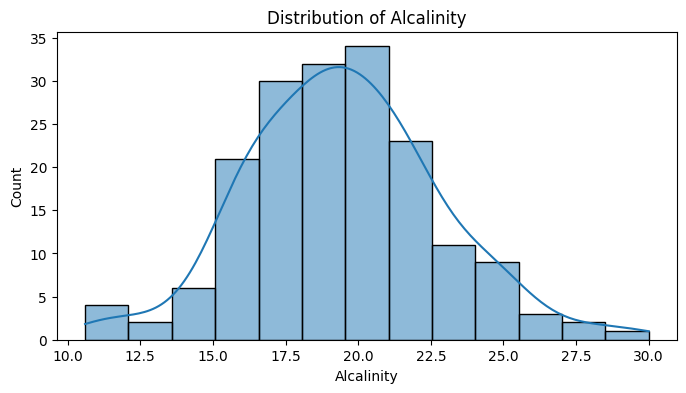

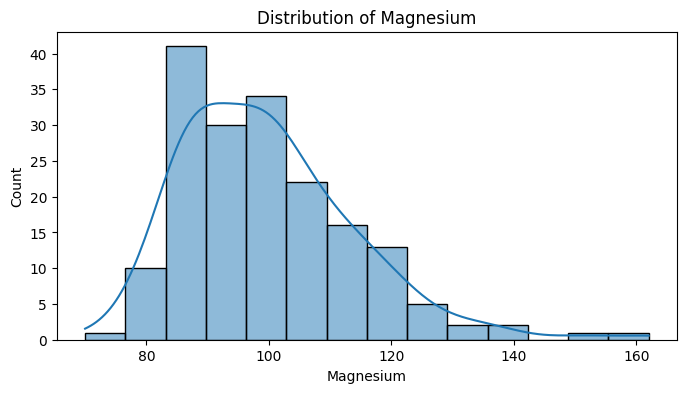

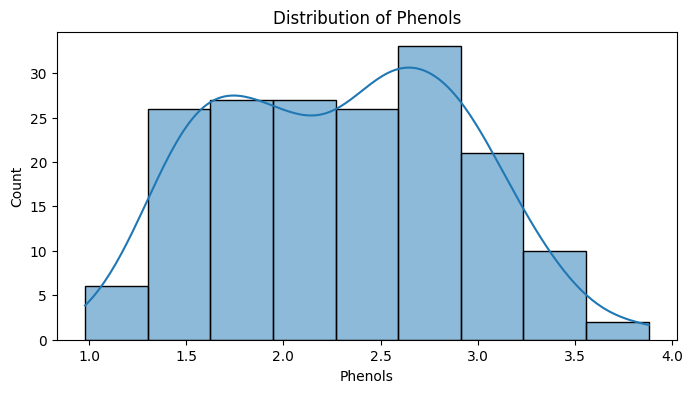

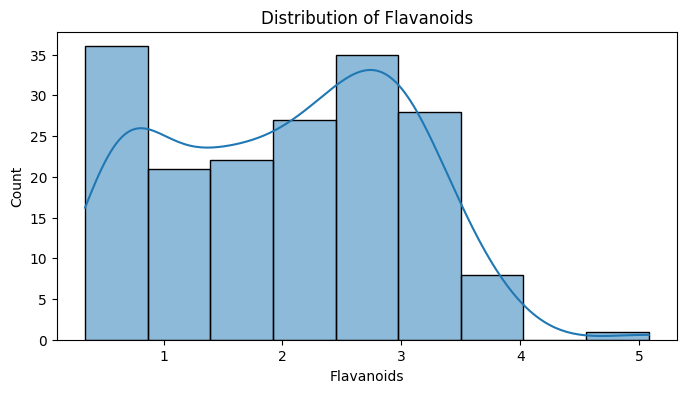

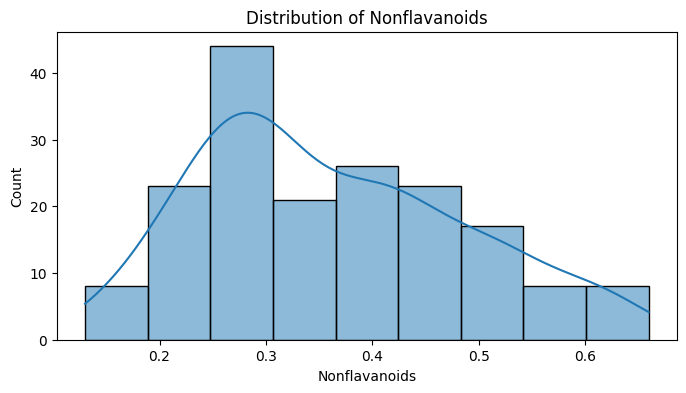

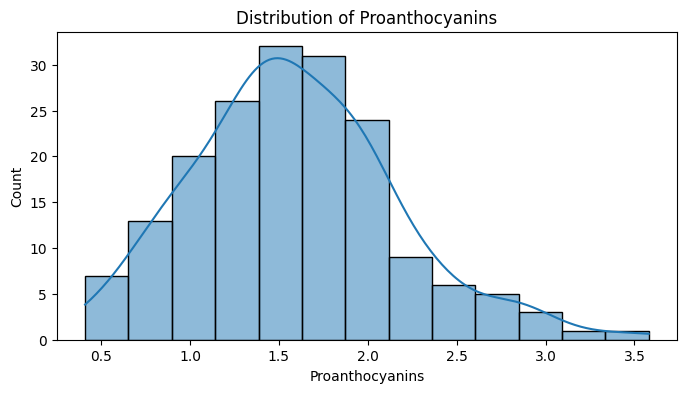

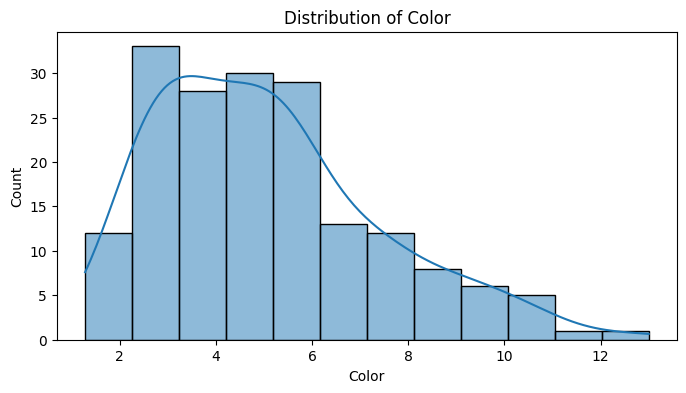

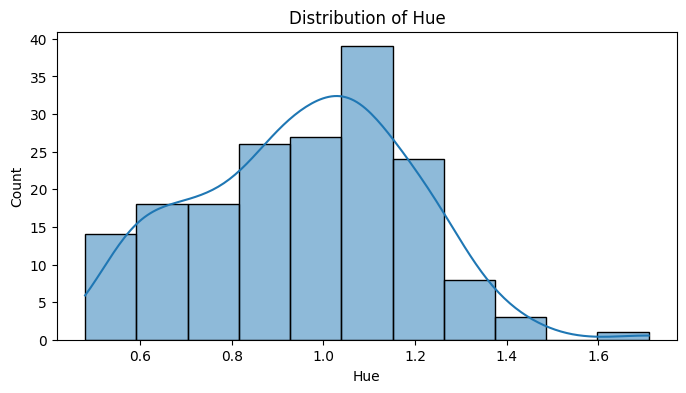

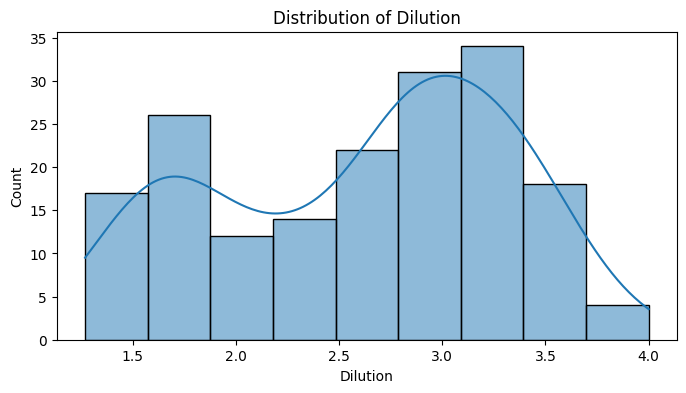

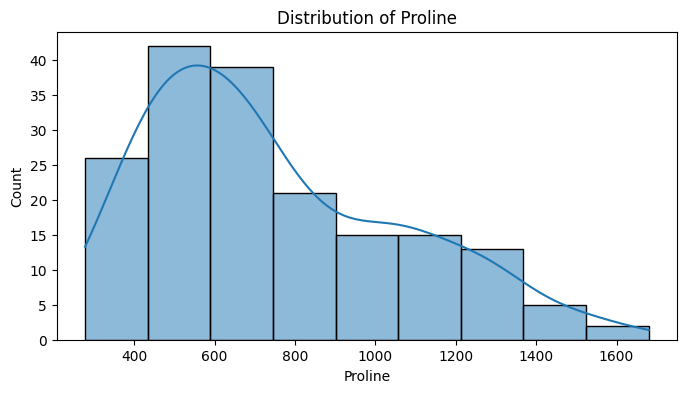

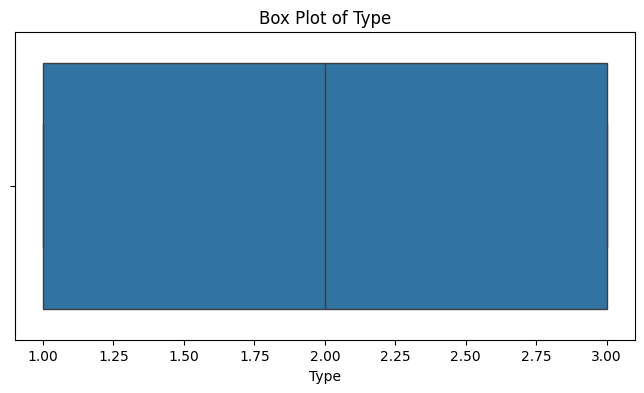

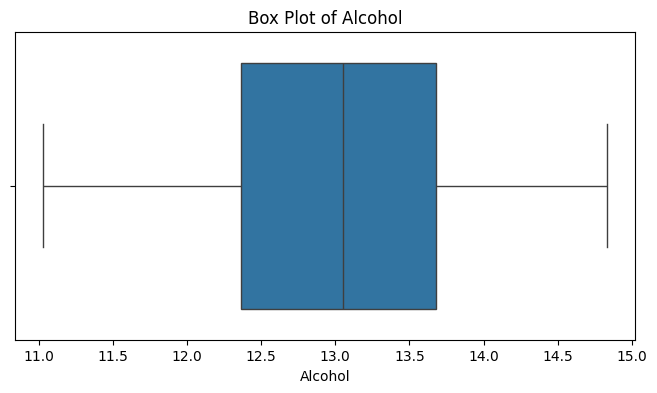

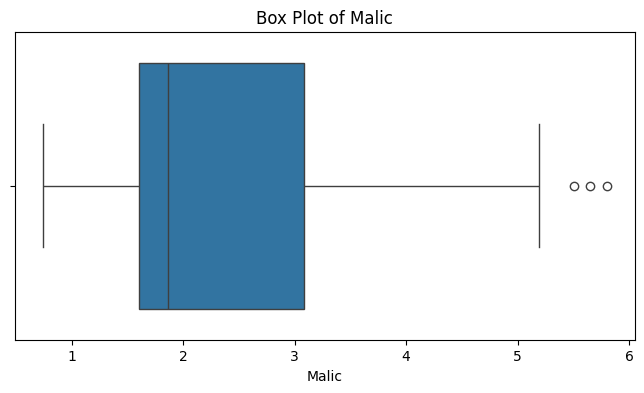

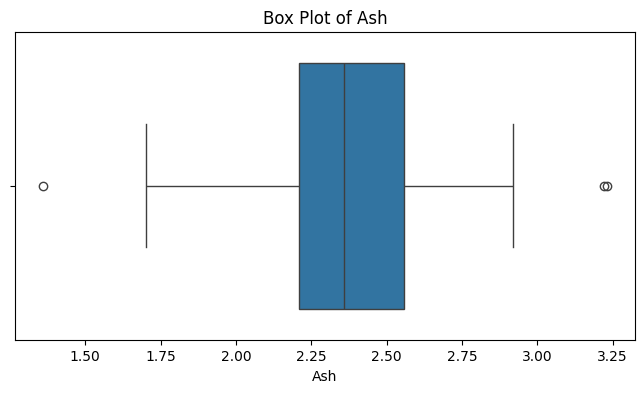

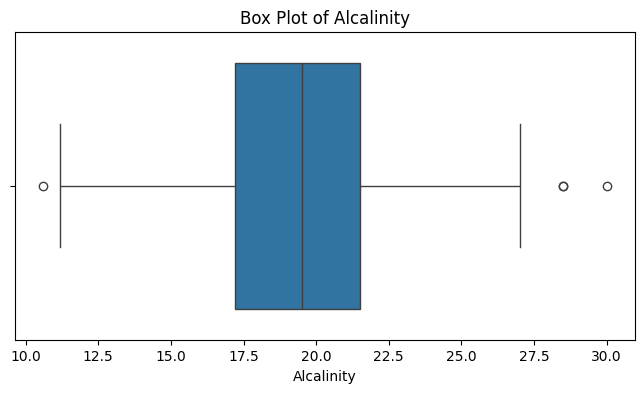

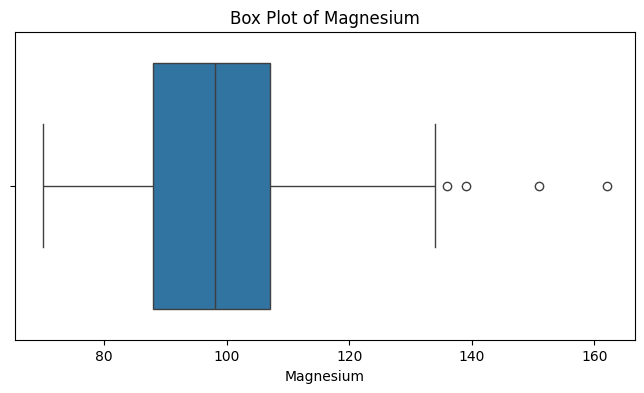

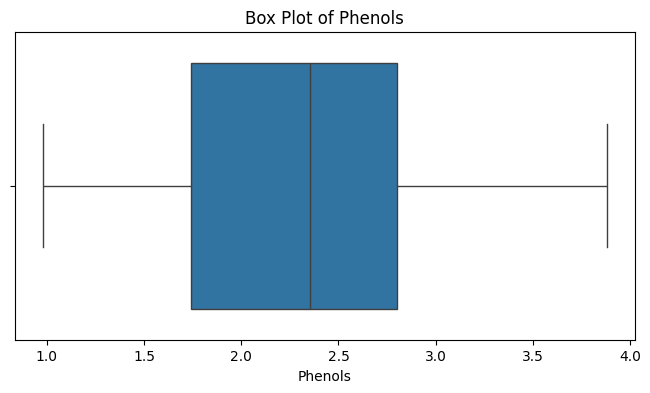

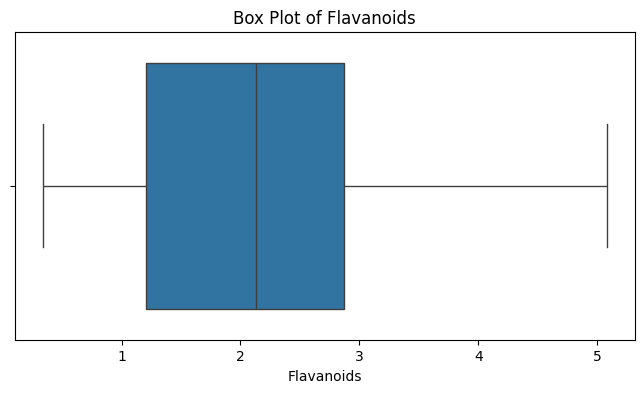

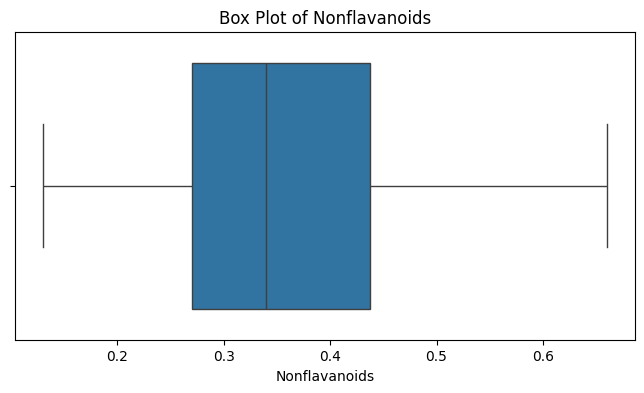

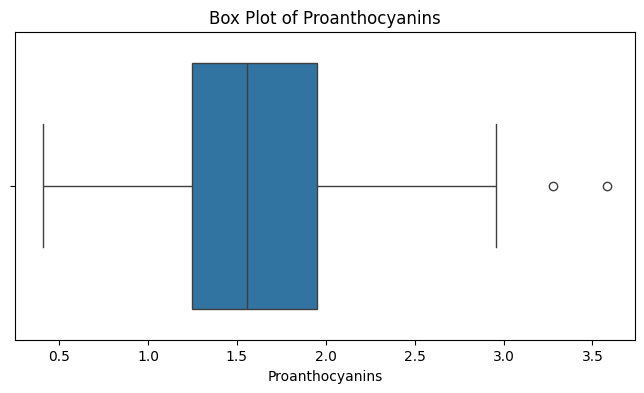

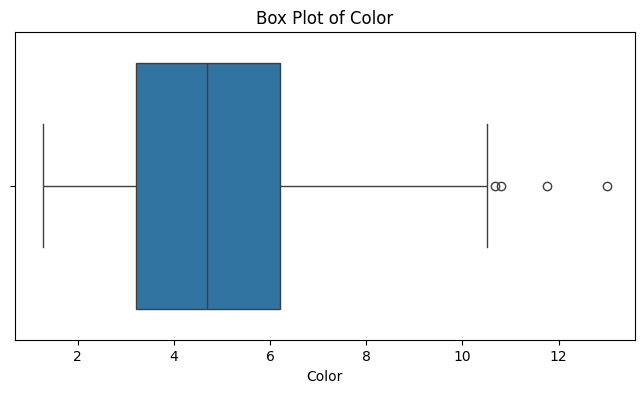

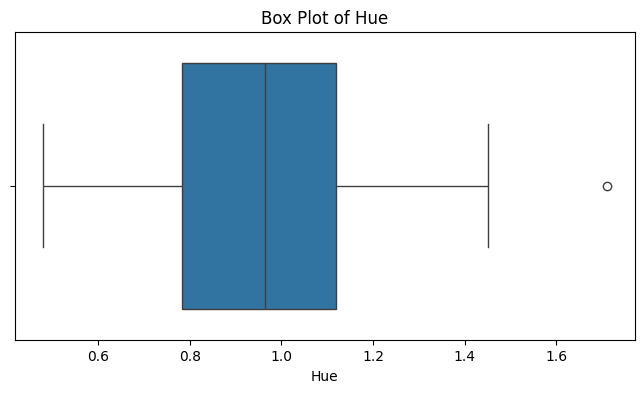

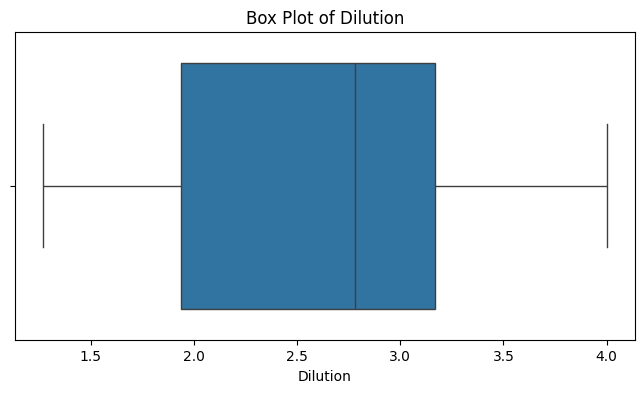

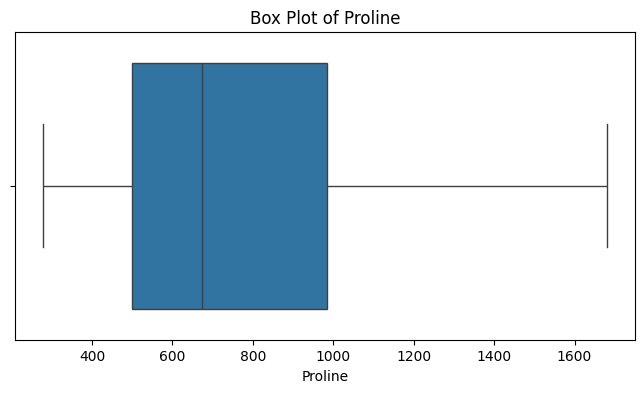

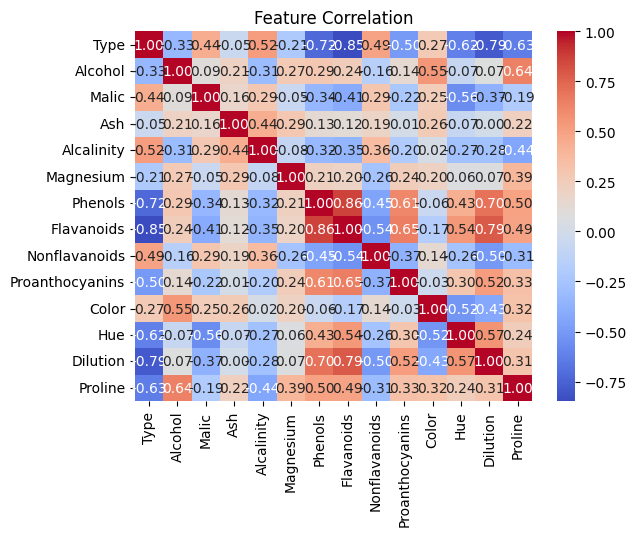

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

data = pd.read_csv('/content/wine.csv')

print(data.info())
print(data.describe())
print(data.isnull().sum())

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

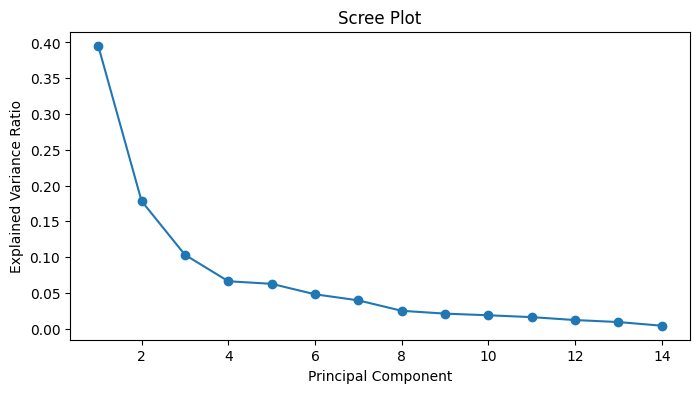

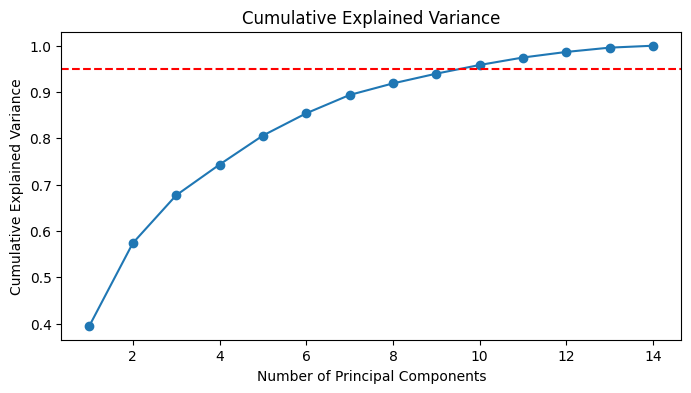

Optimal number of components: 10


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

pca = PCA()
principal_components = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

pca = PCA(n_components=optimal_components)
data_pca = pca.fit_transform(data_scaled)

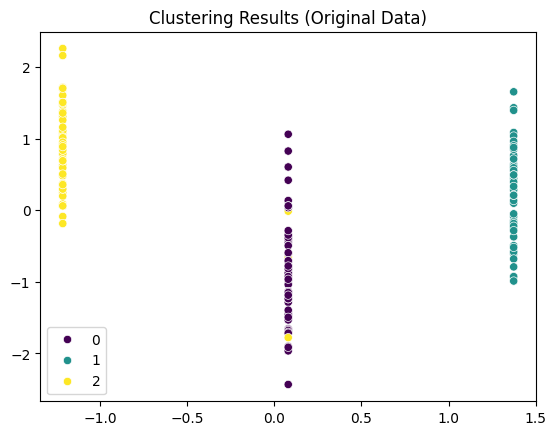

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(data_scaled)

data['Cluster_Original'] = clusters_original

sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters_original, palette='viridis')
plt.title('Clustering Results (Original Data)')
plt.show()

silhouette_original = silhouette_score(data_scaled, clusters_original)
davies_bouldin_original = davies_bouldin_score(data_scaled, clusters_original)

print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")

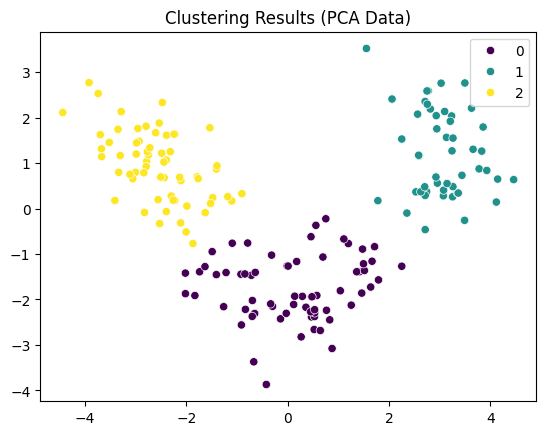

Silhouette Score (PCA Data): 0.32292055407233017
Davies-Bouldin Index (PCA Data): 1.2578453408449173


In [4]:
clusters_pca = kmeans.fit_predict(data_pca)

data['Cluster_PCA'] = clusters_pca

sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters_pca, palette='viridis')
plt.title('Clustering Results (PCA Data)')
plt.show()

silhouette_pca = silhouette_score(data_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(data_pca, clusters_pca)

print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

In [5]:
print("Comparison of Clustering Performance:")
print(f"Silhouette Score - Original: {silhouette_original}, PCA: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original: {davies_bouldin_original}, PCA: {davies_bouldin_pca}")

if silhouette_pca > silhouette_original:
    print("Clustering performance improved after PCA.")
else:
    print("Clustering performance decreased after PCA.")

Comparison of Clustering Performance:
Silhouette Score - Original: 0.30648398324833453, PCA: 0.32292055407233017
Davies-Bouldin Index - Original: 1.315707552261773, PCA: 1.2578453408449173
Clustering performance improved after PCA.


In [7]:
print("Key Findings:")
print("1. PCA reduced dimensionality while preserving most variance.")
print("2. Clustering performance metrics varied between original and PCA data.")

print("Recommendations:")
print("- Use PCA for high-dimensional datasets to reduce computational load.")
print("- Consider clustering directly on the original dataset for better interpretability.")

Key Findings:
1. PCA reduced dimensionality while preserving most variance.
2. Clustering performance metrics varied between original and PCA data.
Recommendations:
- Use PCA for high-dimensional datasets to reduce computational load.
- Consider clustering directly on the original dataset for better interpretability.
